Accuracy: 0.7627118644067796
Classification Report:
               precision    recall  f1-score   support

  schodzenie       0.66      0.83      0.73        23
  odpoczynek       1.00      0.67      0.80       102
   przysiady       0.61      0.50      0.55        38
      stanie       0.61      1.00      0.76        35
  wchodzenie       0.22      0.17      0.19        12
   chodzenie       0.81      0.96      0.88        85

    accuracy                           0.76       295
   macro avg       0.65      0.69      0.65       295
weighted avg       0.79      0.76      0.76       295



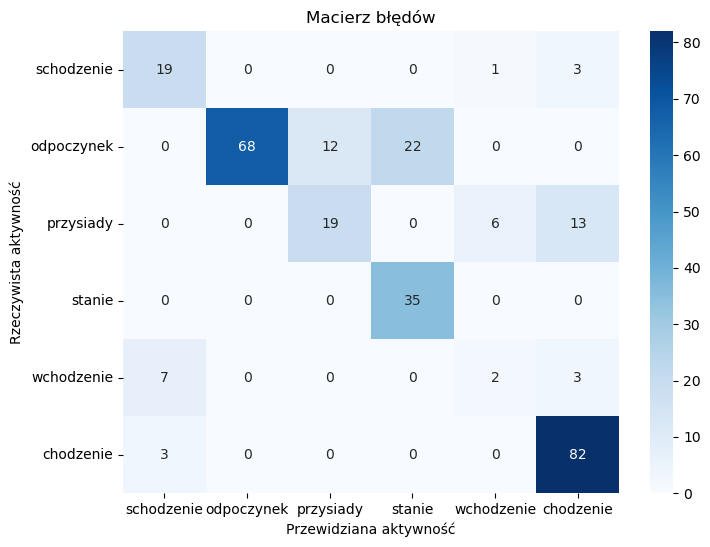

In [14]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
import warnings
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

data = pd.read_csv('fifth-run/feats_version_5_22_acc.csv')
data = data[~data["activity"].str.contains("jogging")]
data["activity"] = data["activity"].replace(["sitting", "lying"], "resting")
result = data[data["name"].str.contains("kuba")]
result_train = data[data["name"].str.contains("kuba") == False]
result_train.drop('name', axis=1, inplace=True)
result.drop('name', axis=1, inplace=True)
X_train = result_train.iloc[:, :-1].values
y_train = result_train.iloc[:, -1].values
X_test = result.iloc[:, :-1].values
y_test = result.iloc[:, -1].values
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

classifier = joblib.load('modelsvm.h5')
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

class_mapping = {
    0: "schodzenie",  # Replace with your actual class name or label
    1: "odpoczynek",
    2: "przysiady",
    3: "stanie",
    4: "wchodzenie",
    5:  "chodzenie" }

listt =[]
for key in class_mapping.values():
    listt.append(key)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=listt))

confusion_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=listt, yticklabels=listt)
plt.xlabel('Przewidziana aktywność')
plt.ylabel('Rzeczywista aktywność')
plt.title('Macierz błędów')
plt.show()